In [1]:
from __future__ import print_function
from __future__ import absolute_import

In [2]:
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os

import numpy as np

import IPython
import ipykernel
print('ipykernel version: ', ipykernel.__version__)
print('IPython version: ', IPython.__version__)


ipykernel version:  6.25.1
IPython version:  8.12.2


In [5]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

Pysaliency
==========

Saliency Map Models
----------------------

`pysaliency` comes with a variety of features to evaluate saliency map models. This notebooks demonstrates these features.

First we load the MIT1003 dataset:

In [6]:
import sys
import pysaliency
from pysaliency.external_datasets.sjtuvis import TextDescriptor

data_location = "../../datasets/test"
text_descriptor = TextDescriptor('../../datasets/test/original_sjtuvis_dataset/text.xlsx')
print(text_descriptor.get_description('000000020777_2.png')) 
mit_stimuli, mit_fixations = pysaliency.external_datasets.get_sjtu_vis("../../datasets/test/original_sjtuvis_dataset", location=data_location, text_descriptor=text_descriptor)

2023-12-11 19:22:32.274 | INFO     | pysaliency.external_datasets.sjtuvis:get_description:63 - image_path:000000020777_2 | image_parts:['000000020777', '2']


{71: 'A passenger train glides around a curve on the outer track.', 77: 'A time lapse image of a guy on a skate board.', 165: "A woman soldier holding up a pair of giant scissors to someone's tie.", 263: 'Adult elephant pushing a baby elephant with its leg.', 312: 'A large group of elephants crossing a dirt path.', 338: 'Two people looking at a large kitchen ', 349: 'An old train drives on the tracks under a bridge. ', 400: 'Dog forlornly looking out the back of a twin-hulled boat.', 490: 'Dog and skateboard in a room and shadow of dog and person on a wall.', 510: 'A man sits on a bench with a man-made waterfall behind him. ', 520: 'Birds flock over a dock above a body of water.', 781: 'A person that is wind surfing in the water.', 908: 'A kitchen with art and a menu hanging on the wall', 939: 'Small bathroom with a mirror, double sink, and a mounted television. ', 999: 'A young man kneeling on top of a base.', 1011: 'People are walking along a sidewalk with their luggage.', 1053: 'A g

2023-12-11 19:22:41.635 | INFO     | pysaliency.external_datasets.sjtuvis:get_description:63 - image_path:000000000071 | image_parts:['000000000071']
2023-12-11 19:22:41.636 | INFO     | pysaliency.external_datasets.sjtuvis:get_description:68 - text:A passenger train glides around a curve on the outer track.
2023-12-11 19:22:41.642 | INFO     | pysaliency.external_datasets.sjtuvis:get_description:63 - image_path:000000000071_0 | image_parts:['000000000071', '0']
2023-12-11 19:22:41.642 | INFO     | pysaliency.external_datasets.sjtuvis:get_description:68 - text:A passenger train glides around a curve on the outer track.
2023-12-11 19:22:41.647 | INFO     | pysaliency.external_datasets.sjtuvis:get_description:63 - image_path:000000000077 | image_parts:['000000000077']
2023-12-11 19:22:41.647 | INFO     | pysaliency.external_datasets.sjtuvis:get_description:68 - text:A time lapse image of a guy on a skate board.
2023-12-11 19:22:41.651 | INFO     | pysaliency.external_datasets.sjtuvis:get

IndexError: boolean index did not match indexed array along dimension 0; dimension is 305177 but corresponding boolean dimension is 1800

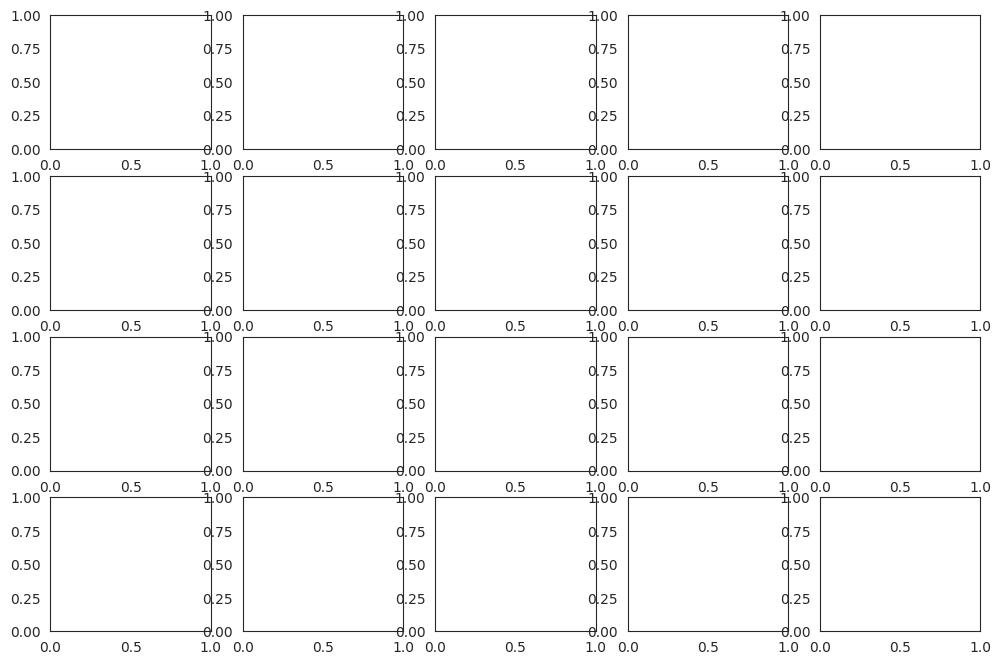

In [7]:
import matplotlib.pyplot as plt
import random
num_rows = 4
num_cols = 5

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Iterate over the images and fixations
for i, ax in enumerate(axes.flat):
    # Get the image and fixations for the current index
    index = random.randint(0, len(mit_stimuli.stimuli) - 1)
    image = mit_stimuli.stimuli[index]
    fixations = mit_fixations[mit_fixations.n == index]

    # Plot the image
    ax.imshow(image)
    ax.axis('off')

    # Plot the fixations as red dots
    ax.scatter(fixations.x, fixations.y, color='r')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

As some evaluation methods can take quite a long time to run, we prepare a smaller dataset consisting of only the first 10 stimuli:

We will use the saliency model *AIM* by Bruce and Tsotos

TypeError: super(type, obj): obj must be an instance or subtype of type

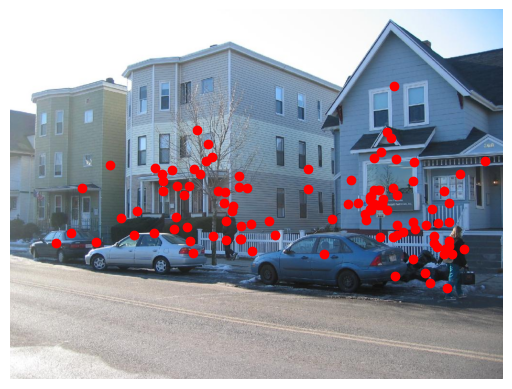

In [ ]:
data_location = "../../datasets"
mit_stimuli, mit_fixations = pysaliency.external_datasets.get_mit1003(location=data_location)
index = 10
plt.imshow(mit_stimuli.stimuli[index])
f = mit_fixations[mit_fixations.n == index]
plt.scatter(f.x, f.y, color='r')
_ = plt.axis('off')
cutoff = 20

aim = pysaliency.AIM(location='../../models', cache_location=os.path.join('model_caches', 'AIM'))

from pysaliency.external_datasets.sjtuvis import TextDescriptor
text_descriptor = TextDescriptor('../../datasets/test/original_sjtuvis_dataset/text.xlsx')
print(text_descriptor.get_description('000000020777_2.png')) 
data_location = "../../datasets/test"
original_dataset_path = "../../datasets/test/original_sjtuvis_dataset"
mit_stimuli, mit_fixations = pysaliency.external_datasets.get_sjtu_vis(original_dataset_path=original_dataset_path, location=data_location, text_descriptor = text_descriptor)
short_stimuli = pysaliency.FileStimuli(filenames=mit_stimuli.filenames[:cutoff])
short_fixations = mit_fixations[mit_fixations.n < cutoff]

gold_standard = pysaliency.FixationMap(short_stimuli, short_fixations, kernel_size=30)
image_based_kl = aim.image_based_kl_divergence(short_stimuli, gold_standard)



sys.exit(0)


import matplotlib.pyplot as plt


smap = aim.saliency_map(mit_stimuli[10])

plt.imshow(image)
plt.axis('off')
plt.show()

plt.imshow(-smap)
print(smap.shape, mit_stimuli[10].shape, type(smap), smap.shape, np.min(smap), np.max(smap))
plt.axis('off')

num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    index = i  # Replace with your desired index
    image = mit_stimuli.stimuli[index]
    print(image.shape)
    saliency_map = aim.saliency_map(image)
    # ax.imshow(image)
    ax.axis('off')
    ax.imshow(-saliency_map)
plt.tight_layout()

# Show the plot
plt.show()

Lavis text guided saliency model. Loaded from the lavis module. 😎 😎 😎

In [ ]:
import torch
from PIL import Image
from lavis.models import load_model_and_preprocess
from lavis.processors import load_processor
from matplotlib import pyplot as plt
from lavis.common.gradcam import getAttMap
from lavis.models.blip_models.blip_image_text_matching import compute_gradcam
import numpy as np




class LavisTextGuidedSaliencyModel(pysaliency.SaliencyMapModel):
    
    def _saliency_map(self, stimulus, text_description="People are walking into the houses with cars parking along the street."):
        # plt.show(stimulus)
        return self.evaluate_saliency_map(stimulus[...,:3], "large", text_description)
    
    def evaluate_saliency_map(self, raw_image, model_path, caption, block_num=7, dst_w=720):
        # Setup device to use
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # Load model and preprocessors
        model, vis_processors, text_processors = load_model_and_preprocess("blip_image_text_matching", model_path, device=device, is_eval=True)
        print(raw_image.shape, raw_image.dtype, np.max(raw_image), np.min(raw_image))
        raw_image = Image.fromarray(np.uint8(raw_image)).convert('RGB')
        # raw_image.show()
        # Plot utilities for GradCam
        w, h = raw_image.size
        scaling_factor = dst_w / w
        resized_img = raw_image.resize((int(w * scaling_factor), int(h * scaling_factor)))
        norm_img = np.float32(resized_img) / 255

        # Preprocess image and text inputs
        img = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
        txt = text_processors["eval"](caption)

        # Compute GradCam
        txt_tokens = model.tokenizer(txt, return_tensors="pt").to(device)
        gradcam, _ = compute_gradcam(model, img, txt, txt_tokens, block_num=block_num)

        # Average GradCam for the full image
        avg_gradcam = getAttMap(norm_img, gradcam[0][1], blur=True)

        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        ax.imshow(avg_gradcam)
        ax.set_yticks([])
        ax.set_xticks([])

        # GradCam for each token
        num_image = len(txt_tokens.input_ids[0]) - 2
        fig, ax = plt.subplots(num_image, 1, figsize=(15, 5 * num_image))

        gradcam_iter = iter(gradcam[0][2:-1])
        token_id_iter = iter(txt_tokens.input_ids[0][1:-1])

        for i, (gradcam, token_id) in enumerate(zip(gradcam_iter, token_id_iter)):
            word = model.tokenizer.decode([token_id])
            gradcam_image = getAttMap(norm_img, gradcam, blur=True)
            ax[i].imshow(gradcam_image)
            ax[i].set_yticks([])
            ax[i].set_xticks([])
            ax[i].set_xlabel(word)

        plt.show()
        return avg_gradcam


2023-12-11 18:31:03.553222: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/mnt/homes/minghao/anaconda3/envs/lavis/lib/python3.8/site-packages/diffusers/models/cross_attention.py:30: FutureWarning: Importing from cross_attention is deprecated. Please import from diffusers.models.attention_processor instead.
  deprecate(


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch    
from typing import Optional, Tuple, List, Dict, Any, Union, Sequence
import pysaliency
DEVICE = 'cuda'

class DeepGazeSaliencyModel(pysaliency.SaliencyMapModel):
    
    def __init__(self, block_num=7, dst_w=720, version = 1):
        super().__init__()
        if version == 1:
            self.model = deepgaze_pytorch.DeepGazeI(pretrained=True).to(DEVICE)
            self.use_hist_scan_path = False
        elif version == 2:
            self.model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)
            self.use_hist_scan_path = True
        elif version == 3:
            self.model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)
            self.use_hist_scan_path = True
        self.block_num = block_num
        self.dst_w = dst_w
        
    def _saliency_map(self, stimulus, text_description:Optional[str]=None):
        image = stimulus
        print("The input image....")
        print(image.shape, image.dtype, np.min(image), np.max(image))
        fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
        fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])

        centerbias_template = np.load('../../pretrained_weights/deepgaze/centerbias_mit1003.npy')
        centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
        centerbias -= logsumexp(centerbias)

        image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
        centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

        if self.use_hist_scan_path:
            x_hist_tensor = torch.tensor([fixation_history_x[self.model.included_fixations]]).to(DEVICE)
            y_hist_tensor = torch.tensor([fixation_history_y[self.model.included_fixations]]).to(DEVICE)
            log_density_prediction = self.model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)
        else:
            log_density_prediction = self.model(image_tensor, centerbias_tensor)

        # f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
        # axs[0].imshow(image)
        # axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
        # axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
        # axs[0].set_axis_off()
        # axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
        # axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
        # axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
        # axs[1].set_axis_off()
        return log_density_prediction.detach().cpu().numpy()[0]


To implement you own saliency map model, inherit from `pysaliency.SaliencyMapModel` and implement the `_saliency_map` method.

------------------------    Model: deepgazeI -----------------------------------


Using cache found in /mnt/homes/minghao/.cache/torch/hub/pytorch_vision_v0.6.0
/mnt/homes/minghao/anaconda3/envs/lavis/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/mnt/homes/minghao/anaconda3/envs/lavis/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~mit1003~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(768, 1024, 3) uint8 0 255
The input image....
(768, 1024, 3) uint8 0 255


/tmp/ipykernel_545917/1832120219.py:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)


(768, 1024) -26.86851953577696 -10.523768886673379 -15.45171217706298 2.4573348518001943 float64


  0%|          | 0/10 [00:00<?, ?it/s]

(768, 1024, 3) uint8 0 255
The input image....
(768, 1024, 3) uint8 0 255


 10%|█         | 1/10 [00:00<00:04,  2.11it/s]

(768, 1024, 3) uint8 0 255
The input image....
(768, 1024, 3) uint8 0 255


 20%|██        | 2/10 [00:00<00:03,  2.13it/s]

(768, 1024, 3) uint8 0 255
The input image....
(768, 1024, 3) uint8 0 255


 30%|███       | 3/10 [00:01<00:03,  2.11it/s]

(768, 1024, 3) uint8 0 255
The input image....
(768, 1024, 3) uint8 0 255


 40%|████      | 4/10 [00:01<00:02,  2.13it/s]

(768, 1024, 3) uint8 0 255
The input image....
(768, 1024, 3) uint8 0 255


 50%|█████     | 5/10 [00:02<00:02,  2.12it/s]

(768, 1024, 3) uint8 0 255
The input image....
(768, 1024, 3) uint8 0 255


 60%|██████    | 6/10 [00:02<00:01,  2.12it/s]

(768, 1024, 3) uint8 0 255
The input image....
(768, 1024, 3) uint8 0 255


 70%|███████   | 7/10 [00:03<00:01,  2.12it/s]

(768, 1024, 3) uint8 0 255
The input image....
(768, 1024, 3) uint8 0 255


 80%|████████  | 8/10 [00:03<00:00,  2.12it/s]

(768, 1024, 3) uint8 0 255
The input image....
(768, 1024, 3) uint8 0 255


 90%|█████████ | 9/10 [00:04<00:00,  2.14it/s]

(768, 1024, 3) uint8 0 255
The input image....
(768, 1024, 3) uint8 0 255


100%|██████████| 10/10 [00:00<00:00, 10605.07it/s]


(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~mit1003_onesize~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(768, 1024) -26.86851953577696 -10.523768886673379 -15.45171217706298 2.4573348518001943 float64


100%|██████████| 10/10 [00:00<00:00, 10976.98it/s]


(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
(768, 1024, 3) uint8 0 255
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~sjtuvis~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{71: 'A passenger train glides around a curve on the outer track.', 77: 'A time lapse image of a guy on a skate board.', 165: "A woman soldier holding up a pair of giant scissors to someone's tie.", 263: 'Adult elephant pushing a baby elephant with its leg.', 312: 'A large group of elephants crossing a dirt path.', 338: 'Two people looking at a large kitchen ', 349: 'An old train drives on the tracks under a bridge. ', 400: 'Dog forlornly looking out the back of a twin-hulled boat.', 490: 'Dog and skateboard in a room and shadow of dog and person on a wall.', 510: 'A man sits on a bench with a man-made waterfall behind him. ', 520: 'Birds flock ove

  0%|          | 0/10 [00:00<?, ?it/s]

(426, 640, 4) uint8 0 255
The input image....
(426, 640, 3) uint8 0 255


 30%|███       | 3/10 [00:00<00:00,  8.63it/s]

(375, 500, 4) uint8 0 255
The input image....
(375, 500, 3) uint8 0 255
(416, 640, 4) uint8 0 255
The input image....
(416, 640, 3) uint8 0 255


 80%|████████  | 8/10 [00:00<00:00, 14.15it/s]

(536, 640, 4) uint8 0 255
The input image....
(536, 640, 3) uint8 0 255


100%|██████████| 10/10 [00:00<00:00, 9476.51it/s]


(426, 640, 4) uint8 0 255


ValueError: No Fixations known for this stimulus!

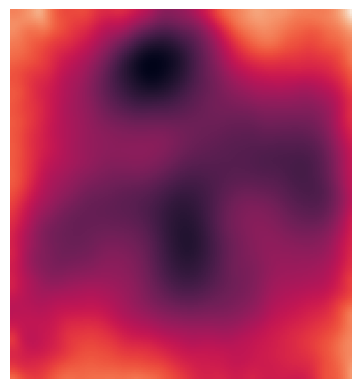

In [ ]:
import os
model_zoos = ["deepgazeI", "deepgazeIIE", "deepgazeIII", "AIM", "SUN", "IttiKoch", "Judd", "CovSal", "ours"]
import pysaliency
from pysaliency.external_models import AIM, SUN, GBVSIttiKoch, Judd, IttiKoch, CovSal
from pysaliency.external_datasets.sjtuvis import TextDescriptor
import numpy as np
import matplotlib.pyplot as plt

from pysaliency.external_datasets import get_mit1003, get_sjtu_vis, get_cat2000_train, get_FIGRIM, get_mit300, get_mit1003, get_mit1003_onesize, get_SALICON, get_toronto

DATASET_MAPPINGS = {
	"mit1003": get_mit1003,
	"mit1003_onesize": get_mit1003_onesize,
 	"sjtuvis": get_sjtu_vis,
	# "mit_300": get_mit300,
	# "cat2000_train": get_cat2000_train,
	# "figrim": get_FIGRIM,
	# "salicon_train": get_SALICON,
	# "salicon_eval": get_SALICON,
	# "toronto": get_toronto,
              
}
import pandas as pd

# Define the columns based on the metrics and models
columns = ['Model', 'Dataset', 'AUC_shuffled', 'AUC_uniform', 'KL_uniform', 'KL_shuffled', 'KL_identical_nonfixations', 'Image_based_KL_divergence']
results_df = pd.DataFrame(columns=columns)


for model in model_zoos[:1]:
	print(f"------------------------    Model: {model} -----------------------------------")
	# model: pysaliency.SaliencyMapModel
	model_location = "../../models/"
	if model != "deepgazeI":
		continue
	if model == "deepgazeI":
		model: pysaliency.SaliencyMapModel = DeepGazeSaliencyModel(version=1)
	elif model == "deepgazeIIE":
		model: pysaliency.SaliencyMapModel = DeepGazeSaliencyModel(version=2)
	elif model == "deepgazeIII":
		model: pysaliency.SaliencyMapModel = DeepGazeSaliencyModel(version=3)
	elif model == "ours":
		model: pysaliency.SaliencyMapModel = LavisTextGuidedSaliencyModel(cache_location=os.path.join('model_caches', 'AIM'), caching=True)
	elif model == "GoldStandard":
		raise NotImplementedError
	else:
		model: pysaliency.SaliencyMapModel = eval(model)(location = model_location, cache_location=os.path.join('model_caches', 'AIM'))
	
	
	
	for dataset_key, dataset_func in DATASET_MAPPINGS.items():
		dataset_location = "../../datasets/"
		print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~{dataset_key}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
		if dataset_key == "sjtuvis":
			text_descriptor = TextDescriptor('../../datasets/test/original_sjtuvis_dataset/text.xlsx')
			mit_stimuli, mit_fixations = dataset_func(location=dataset_location, text_descriptor=text_descriptor)
		elif dataset_key == "cat2000_train":
			mit_stimuli, mit_fixations = dataset_func(location=dataset_location, version = "1.1")
		elif dataset_key == "salicon_train":
			stimuli_train, stimuli_val, stimuli_test, fixations_train, fixations_val = dataset_func(location=dataset_location)
			mit_stimuli, mit_fixations = stimuli_train, fixations_train
		elif dataset_key == "salicon_eval":
			stimuli_train, stimuli_val, stimuli_test, fixations_train, fixations_val = dataset_func(location=dataset_location)
			mit_stimuli, mit_fixations = stimuli_val, fixations_val
		else:
			mit_stimuli, mit_fixations = dataset_func(location=dataset_location)
			
		cutoff = 10
		short_stimuli = pysaliency.FileStimuli(filenames=mit_stimuli.filenames[:cutoff])
		short_fixations = mit_fixations[mit_fixations.n < cutoff]
		
		smap = model.saliency_map(mit_stimuli[10])
		# print("The output image...")
		# print(smap.shape, np.min(smap), np.max(smap), np.mean(smap), np.std(smap), smap.dtype) 
		plt.imshow(-smap)
		plt.axis('off')
  
		auc_uniform = model.AUC(short_stimuli, short_fixations, nonfixations='uniform', verbose=True)
		auc_shuffled = model.AUC(short_stimuli, short_fixations, nonfixations='shuffled', verbose=True)
		auc_identical_nonfixations = model.AUC(short_stimuli, short_fixations, nonfixations=short_fixations, verbose=True)
		kl_uniform = model.fixation_based_KL_divergence(short_stimuli, short_fixations, nonfixations='uniform')
		kl_shuffled = model.fixation_based_KL_divergence(short_stimuli, short_fixations, nonfixations='shuffled')
		kl_identical = model.fixation_based_KL_divergence(short_stimuli, short_fixations, nonfixations=short_fixations)
		gold_standard = pysaliency.FixationMap(short_stimuli, short_fixations, kernel_size=30)
		image_based_kl = model.image_based_kl_divergence(short_stimuli, gold_standard)
		plt.close()

		result = {
			'Model': model,
			'Dataset': dataset_key,
			'AUC_shuffled': auc_shuffled,
			'AUC_uniform': auc_uniform,
			'KL_uniform': kl_uniform,	
			'KL_shuffled': kl_shuffled,
			'KL_identical_nonfixations': kl_identical,
			'Image_based_KL_divergence': image_based_kl,
		}

		# results_df = results_df.append(result, ignore_index=True)
		results_df = pd.concat([results_df, pd.DataFrame([result])], ignore_index=True)
		
  

In [ ]:
# Display the DataFrame
print(results_df)

# Optional: Save the DataFrame to a CSV file
# results_df.to_csv('experiment_results.csv', index=False)

# Example of a simple visualization (adjust as needed)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='AUC_shuffled', hue='Dataset')
plt.title('AUC Shuffled by Model and Dataset')
plt.xticks(rotation=45)
plt.show()